#### Import required libraries

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Load datasets

In [27]:
rural_df = pd.read_csv("states_rural.csv")
print(rural_df)

         state_name                   dist_name area_type    Total  \
0    andhra pradesh                   Adilabad      Rural   847801   
1    andhra pradesh                  Nizamabad      Rural   870992   
2    andhra pradesh                 Karimnagar      Rural  1270037   
3    andhra pradesh                      Medak      Rural   966666   
4    andhra pradesh                 Rangareddy      Rural   649773   
..              ...                         ...       ...      ...   
626     west bengal                    Puruliya     Rural   518434   
627     west bengal                       Haora     Rural   505344   
628     west bengal  South Twenty Four Parganas     Rural  1394010   
629     west bengal           Paschim Medinipur     Rural  1303465   
630     west bengal             Purba Medinipur     Rural   972010   

     illiterate_males  literate_males  graduate_males  illiterate_females  \
0              208837          262235           14684              268525   
1    

In [3]:
urban_df = pd.read_csv("states_urban.csv")
print(urban_df)

         state_name                   dist_name area_type    Total  \
0    andhra pradesh                   Adilabad      Urban   218845   
1    andhra pradesh                  Nizamabad      Urban   184324   
2    andhra pradesh                 Karimnagar      Urban   319695   
3    andhra pradesh                      Medak      Urban   227779   
4    andhra pradesh                  Hyderabad      Urban  1096269   
..              ...                         ...       ...      ...   
632     west bengal                       Haora     Urban   992381   
633     west bengal                     Kolkata     Urban  1574263   
634     west bengal  South Twenty Four Parganas     Urban   610204   
635     west bengal           Paschim Medinipur     Urban   208684   
636     west bengal             Purba Medinipur     Urban   156826   

     illiterate_males  literate_males  graduate_males  illiterate_females  \
0               35851          133025           21833               24483   
1    

#### Drop empty columns

In [28]:
rural_df = rural_df.dropna(axis=1, how='all')
urban_df = urban_df.dropna(axis=1, how='all')

#### Standardize column names

In [29]:
rural_df.columns = rural_df.columns.str.strip().str.lower().str.replace(" ", "_")
urban_df.columns = urban_df.columns.str.strip().str.lower().str.replace(" ", "_")

#### Add region identifier

In [30]:
rural_df["region"] = "Rural"
urban_df["region"] = "Urban"

#### Combine the datasets

In [31]:
combined_df = pd.concat([rural_df, urban_df], ignore_index=True)
print(combined_df)

          state_name                   dist_name area_type    total  \
0     andhra pradesh                   Adilabad      Rural   847801   
1     andhra pradesh                  Nizamabad      Rural   870992   
2     andhra pradesh                 Karimnagar      Rural  1270037   
3     andhra pradesh                      Medak      Rural   966666   
4     andhra pradesh                 Rangareddy      Rural   649773   
...              ...                         ...       ...      ...   
1263     west bengal                       Haora     Urban   992381   
1264     west bengal                     Kolkata     Urban  1574263   
1265     west bengal  South Twenty Four Parganas     Urban   610204   
1266     west bengal           Paschim Medinipur     Urban   208684   
1267     west bengal             Purba Medinipur     Urban   156826   

      illiterate_males  literate_males  graduate_males  illiterate_females  \
0               208837          262235           14684              2

#### Fill missing graduation percentage values

In [32]:
combined_df["percent_graduate_males"] = combined_df["percent_graduate_males"].fillna(
    (combined_df["graduate_males"] / (combined_df["literate_males"] + 1) * 100).round(2)
)
combined_df["percent_graduate_females"] = combined_df["percent_graduate_females"].fillna(
    (combined_df["graduate_females"] / (combined_df["literate_females"] + 1) * 100).round(2)
)

#### Group by state and region for mean calculations

In [33]:
summary_df = combined_df.groupby(['state_name', 'region'])[
    ['literate_males', 'literate_females', 'percent_graduate_males', 'percent_graduate_females']
].mean().reset_index()

#### Plot: Literacy Comparison - Males

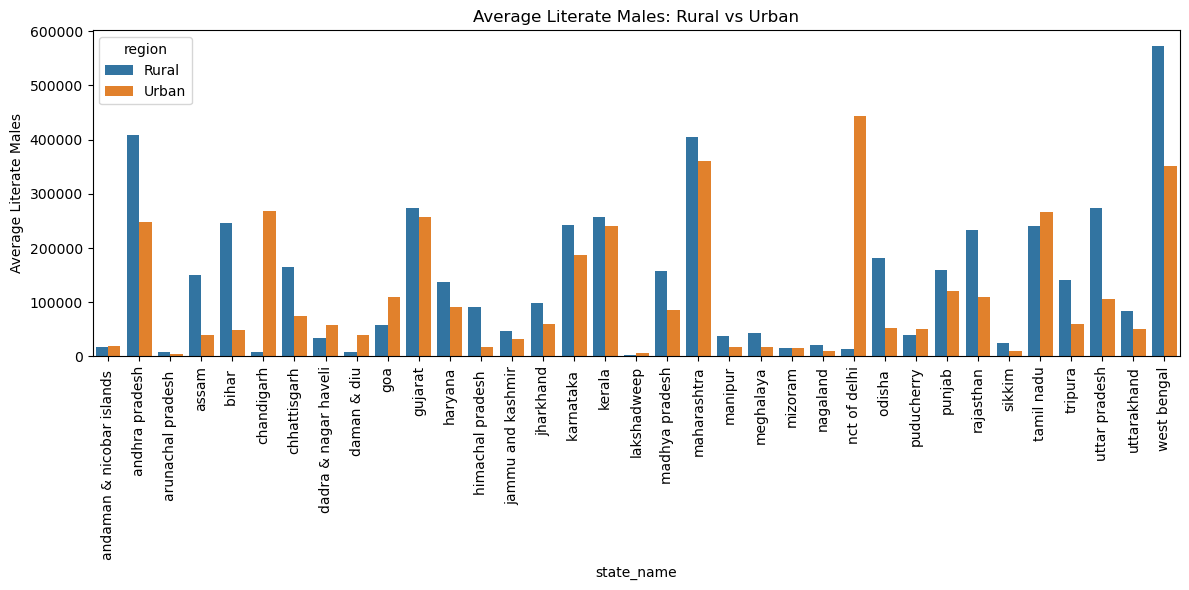

In [34]:
plt.figure(figsize=(12, 6))
sns.barplot(data=summary_df, x='state_name', y='literate_males', hue='region')
plt.title("Average Literate Males: Rural vs Urban")
plt.xticks(rotation=90)
plt.ylabel("Average Literate Males")
plt.tight_layout()
plt.show()

#### Plot: Literacy Comparison - Females

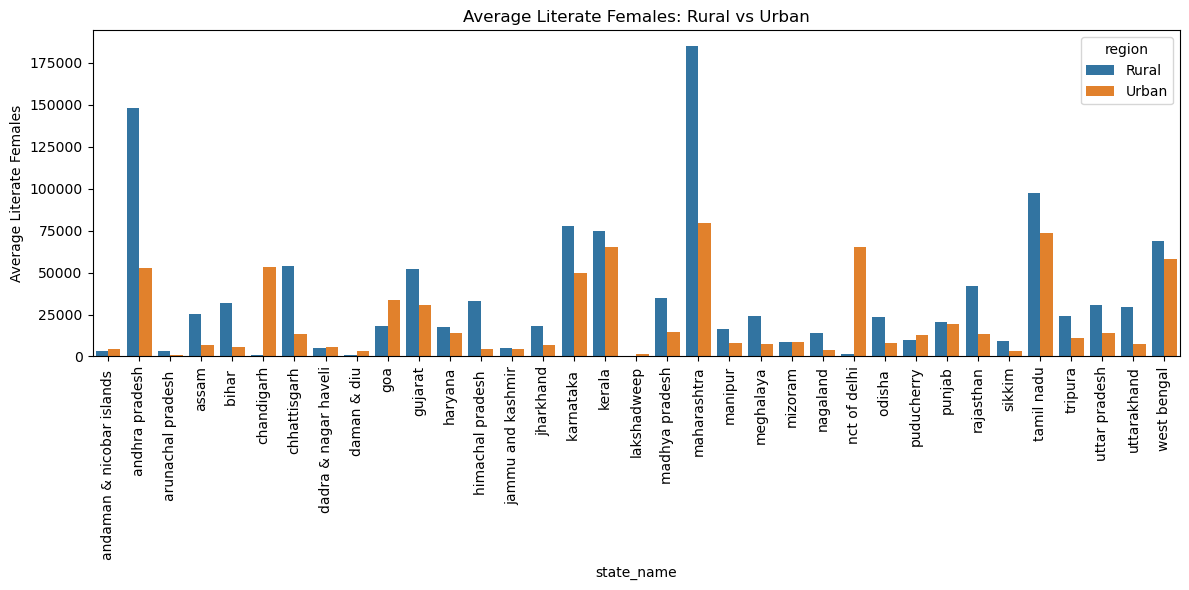

In [35]:
plt.figure(figsize=(12, 6))
sns.barplot(data=summary_df, x='state_name', y='literate_females', hue='region')
plt.title("Average Literate Females: Rural vs Urban")
plt.xticks(rotation=90)
plt.ylabel("Average Literate Females")
plt.tight_layout()
plt.show()

#### Plot: Graduate Percentages - Males

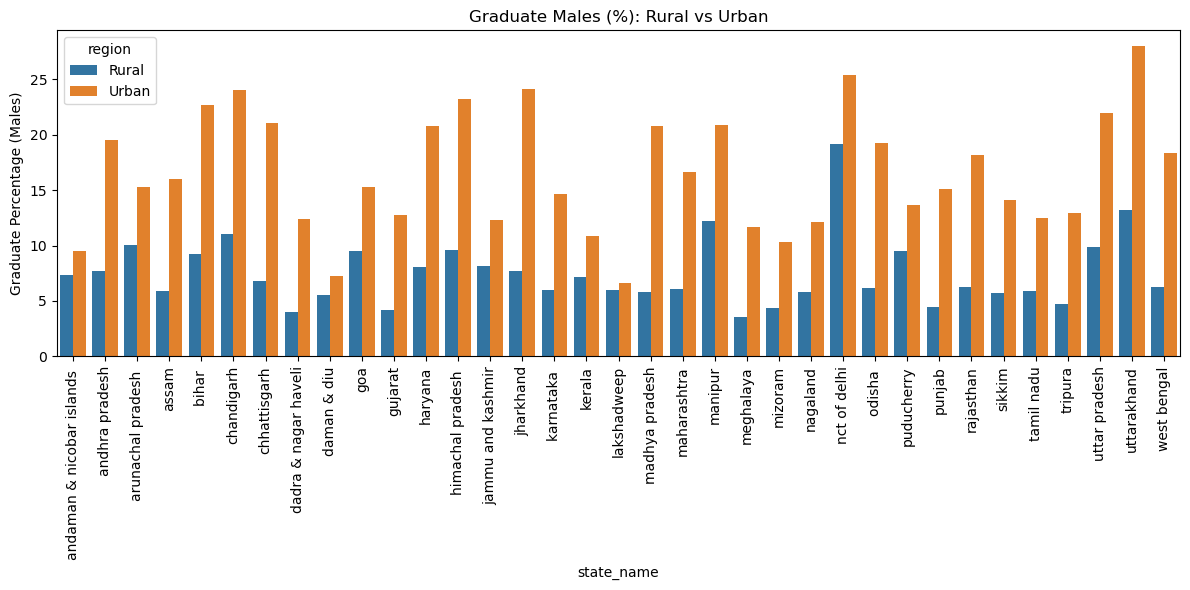

In [36]:
plt.figure(figsize=(12, 6))
sns.barplot(data=summary_df, x='state_name', y='percent_graduate_males', hue='region')
plt.title("Graduate Males (%): Rural vs Urban")
plt.xticks(rotation=90)
plt.ylabel("Graduate Percentage (Males)")
plt.tight_layout()
plt.show()

#### Plot: Graduate Percentages - Females

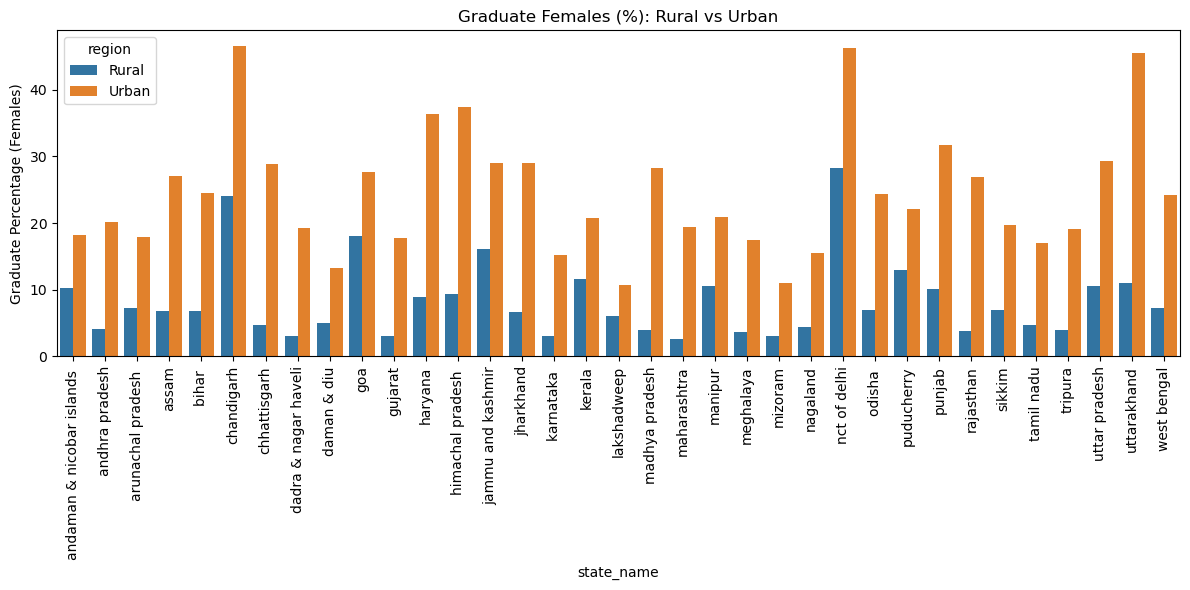

In [37]:
plt.figure(figsize=(12, 6))
sns.barplot(data=summary_df, x='state_name', y='percent_graduate_females', hue='region')
plt.title("Graduate Females (%): Rural vs Urban")
plt.xticks(rotation=90)
plt.ylabel("Graduate Percentage (Females)")
plt.tight_layout()
plt.show()

#### Overall Literacy Rate Comparison

In [38]:
combined_df["total_literate"] = combined_df["literate_males"] + combined_df["literate_females"]
combined_df["total_population"] = combined_df["total"]
combined_df["literacy_rate"] = (combined_df["total_literate"] / combined_df["total_population"]) * 100

# Re-group by state and region
summary_df = combined_df.groupby(['state_name', 'region'])[
    ['literacy_rate']
].mean().reset_index()

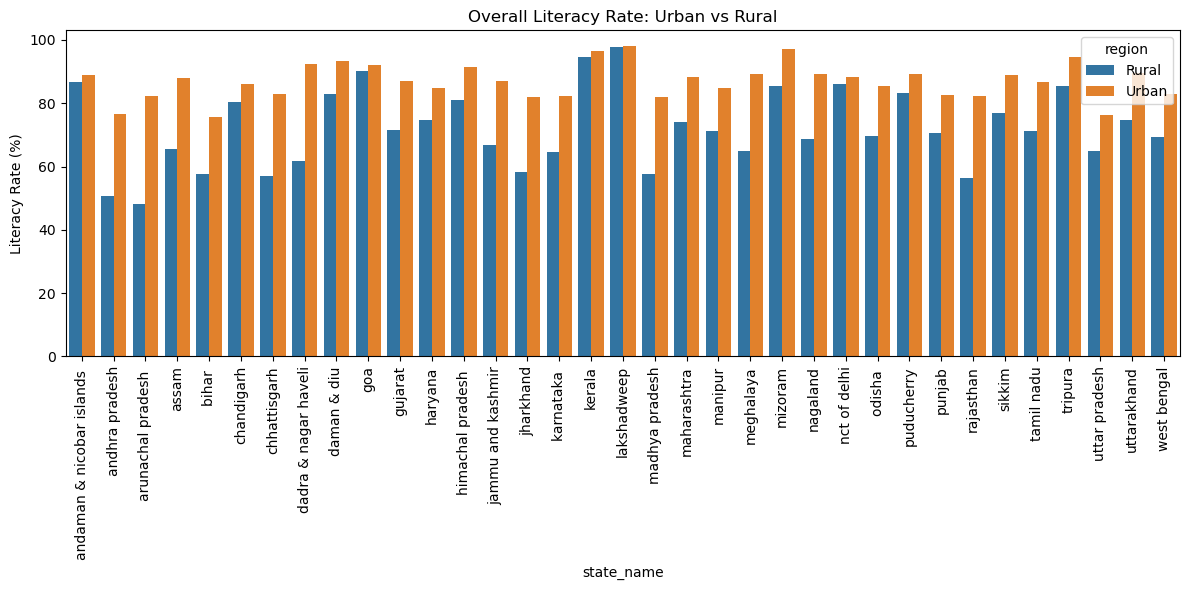

In [39]:
plt.figure(figsize=(12, 6))
sns.barplot(data=summary_df, x='state_name', y='literacy_rate', hue='region')
plt.title("Overall Literacy Rate: Urban vs Rural")
plt.xticks(rotation=90)
plt.ylabel("Literacy Rate (%)")
plt.tight_layout()
plt.show()

#### Literacy Gap by State

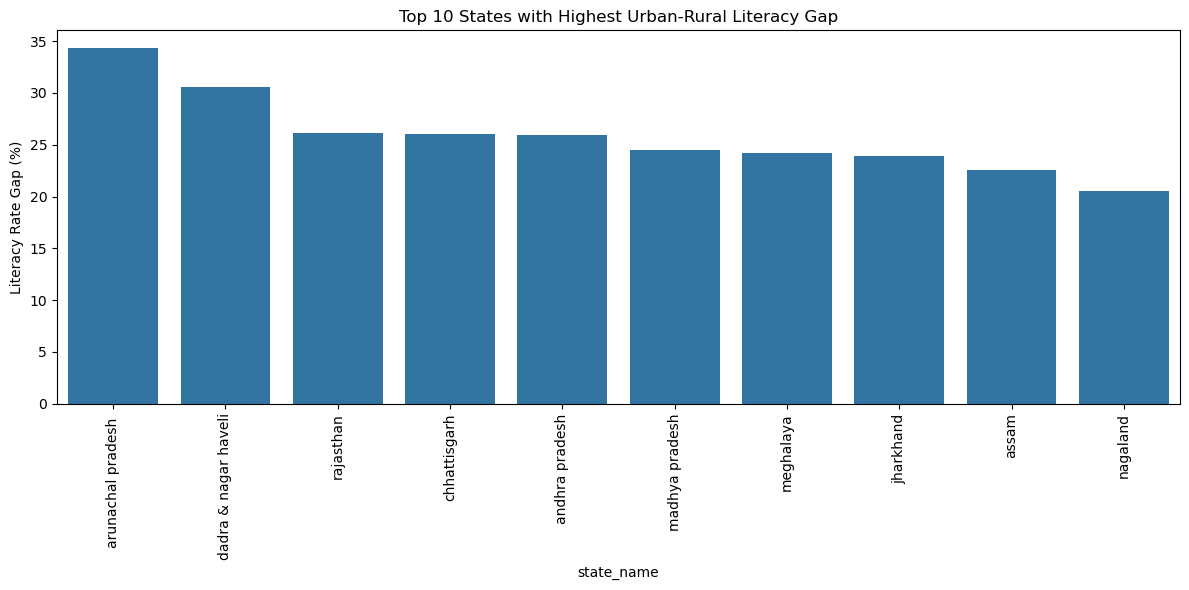

In [40]:
gap_df = summary_df.pivot(index='state_name', columns='region', values='literacy_rate').reset_index()
gap_df['literacy_gap'] = gap_df['Urban'] - gap_df['Rural']

# Sort and plot top 10 states with highest gap
gap_df_sorted = gap_df.sort_values(by='literacy_gap', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=gap_df_sorted.head(10), x='state_name', y='literacy_gap')
plt.title("Top 10 States with Highest Urban-Rural Literacy Gap")
plt.xticks(rotation=90)
plt.ylabel("Literacy Rate Gap (%)")
plt.tight_layout()
plt.show()

#### Create a Heatmap

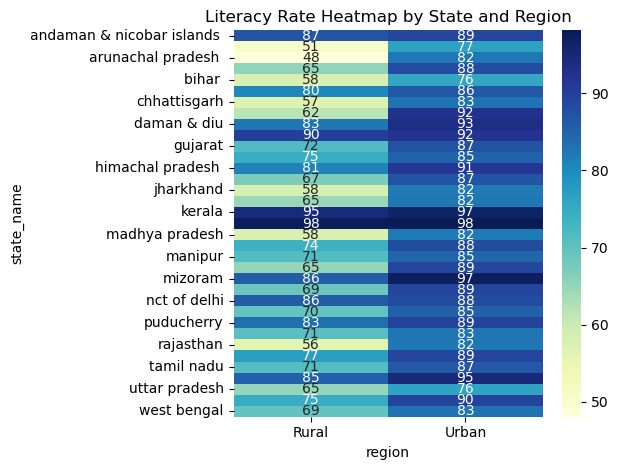

In [41]:
heatmap_data = summary_df.pivot(index='state_name', columns='region', values='literacy_rate')
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu")
plt.title("Literacy Rate Heatmap by State and Region")
plt.tight_layout()
plt.show()

#### Graduation Gender Gap (Male - Female)

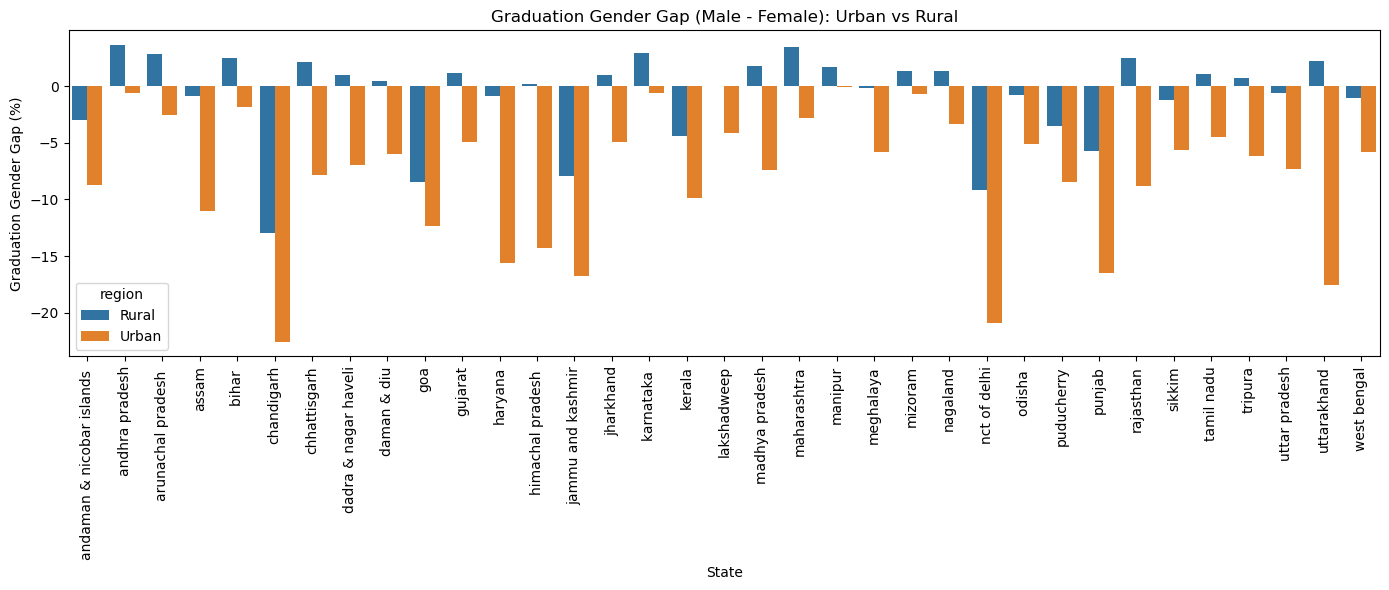

In [47]:
# Re-group with correct columns
summary_df = combined_df.groupby(['state_name', 'region'])[
    ['literate_males', 'literate_females', 
     'percent_graduate_males', 'percent_graduate_females']
].mean().reset_index()

# Then calculate and plot
summary_df['gender_grad_gap'] = summary_df['percent_graduate_males'] - summary_df['percent_graduate_females']

plt.figure(figsize=(14, 6))
sns.barplot(data=summary_df, x='state_name', y='gender_grad_gap', hue='region')
plt.title("Graduation Gender Gap (Male - Female): Urban vs Rural")
plt.xticks(rotation=90)
plt.ylabel("Graduation Gender Gap (%)")
plt.xlabel("State")
plt.tight_layout()
plt.show()
